In [1]:
import sys, os, glob, h5py
import time, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Load the modules
sys.path.insert(1, "/home/nexus-admin/NEXUS_RF/BackendTools")
import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import TimestreamHelperFunctions as Thf

In [3]:
## MB Results come from fitting a temperature scan at a specified RF power
MB_fit_vals = np.array([4.24216+9.75e-6, 
                        0.177  ,
                        0.0125 ,
                        4.1e7  ]) ## [ F0 [GHz] , Delta , alpha , Qi0 ]

In [ ]:
## 6/07 Al Runs
series_list = np.array([
#     "20220607_095300" , 
    "20220607_100452" , 
    "20220607_100858" , 
    "20220607_101139" , 
    "20220607_102016" , 
    "20220607_102257" , 
    "20220607_102619" , 
    "20220607_103040" , 
    "20220607_103312" , 
    "20220607_103536" , 
    "20220607_103820" , 
    "20220607_104103" , 
    "20220607_104418" , 
    "20220607_104739" , 
#     "20220607_105011" 
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_min, stop=P_max+P_step, step=P_step)[1:-1]

In [ ]:
## 6/19 Al Runs
series_list = np.array([
    "20220619_155709",
    "20220619_153053",
    "20220619_152817",
    "20220619_152542",
    "20220619_152210",
    "20220619_151914",
#     "20220619_151634",
#     "20220619_151405",
#     "20220619_150933",
#     "20220619_150645",
#     "20220619_150415",
#     "20220619_150117",
#     "20220619_145802",
#     "20220619_145536",
#     "20220619_145204"
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[:6]#[3:-1]

In [ ]:
## 6/19 Nb7 Runs
series_list = np.array([
#     "20220619_171322",
#     "20220619_171119",
#     "20220619_170714",
    "20220619_170214",
    "20220619_170017",
    "20220619_165127",
    "20220619_164921",
    "20220619_164721",
    "20220619_164257",
    "20220619_164056",
    "20220619_162829",
    "20220619_162632",
    "20220619_161836",
    "20220619_161640",
    "20220619_160446"
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[3:]

In [ ]:
## 6/30 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20220630_090941",
    "20220630_090827",
    "20220630_090713",
    "20220630_090559",
    "20220630_090445",
    "20220630_090331",
    "20220630_090217",
    "20220630_090103",
    "20220630_085949",
    "20220630_085835",
    "20220630_085721",
    "20220630_085600"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 6/30 Al Runs - Shield Closed, No Laser, people in clean room
series_list = np.array([
    "20220630_120041",
    "20220630_115927",
    "20220630_115813",
    "20220630_115659",
    "20220630_115545",
    "20220630_115431",
    "20220630_115317",
    "20220630_115203",
    "20220630_115049",
    "20220630_114935",
    "20220630_114821",
    "20220630_114700"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 6/30 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20220630_155428",
    "20220630_155320",
    "20220630_155212",
    "20220630_155104",
    "20220630_154956",
    "20220630_154848",
    "20220630_154740",
    "20220630_154632",
    "20220630_154524",
    "20220630_154416",
    "20220630_154308",
    "20220630_154154"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 7/6 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20220706_164154",
    "20220706_164040",
    "20220706_163926",
    "20220706_163812",
    "20220706_163658",
    "20220706_163544",
    "20220706_163430",
    "20220706_163316",
    "20220706_163202",
    "20220706_163048",
    "20220706_162934",
    "20220706_162814"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 10/19 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20221019_121526",
    "20221019_121708",
    "20221019_121843",
    "20221019_122019",
    "20221019_122154",
    "20221019_122329",
    "20221019_122504",
    "20221019_122639",
    "20221019_122815",
    "20221019_122951"
])

P_min = -60 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[::-1]

In [ ]:
## 10/28 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20221028_150303",
    "20221028_150154",
    "20221028_150045",
    "20221028_145936",
    "20221028_145827",
    "20221028_145718",
    "20221028_145609",
    "20221028_145500",
    "20221028_145352",
    "20221028_145244",
    "20221028_145136",
    "20221028_145021"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [4]:
## 4/10 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20230410_120536",
    "20230410_120407",
    "20230410_120238",
    "20230410_120110",
    "20230410_115942",
    "20230410_115814",
    "20230410_115640"
])

P_min = -60 ; P_max = -30 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [5]:
for i in np.arange(len(series_list)):
    print(series_list[i], ":", powers_list[i], "dBm")

20230410_120536 : -30 dBm
20230410_120407 : -35 dBm
20230410_120238 : -40 dBm
20230410_120110 : -45 dBm
20230410_115942 : -50 dBm
20230410_115814 : -55 dBm
20230410_115640 : -60 dBm


In [6]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series_list[3], verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
print(avg_frqs, avg_S21s)

Line Delay file:  None
VNA scan file:    USRP_VNA_20230410_120110.h5
Noise ts files:   ['USRP_Noise_20230410_120110_delta0.h5']
Laser ts files:   []
Summary file:	 noise_averages_20230410_120110.h5
[4241.99962  4242.000485 4242.001351] [0.00426493+0.00268114j 0.00409309+0.00292488j 0.00399365+0.0031882j ]


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


In [ ]:
powers, PSDs, res, timestreams = Thf.CleanPSDs(tone_files[0], vna_file, f_transient=0.075,
                                               charFs = avg_frqs,
                                               charZs = avg_S21s,
                                               MBresults = MB_fit_vals)

In [ ]:
PSDs.keys()

In [ ]:
plt.loglog(PSDs['f'],PSDs['kappa_1'])

In [ ]:
del powers, PSDs, res, timestreams

## Now package it all together

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


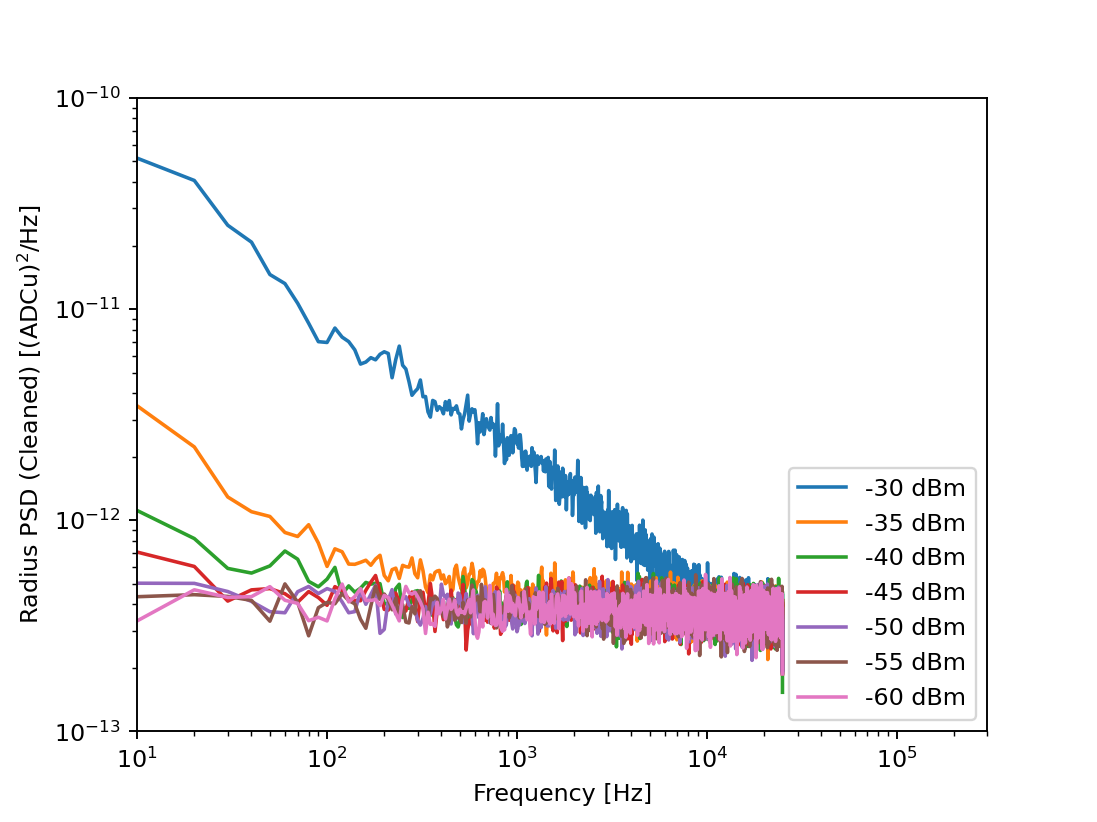

<IPython.core.display.Javascript object>


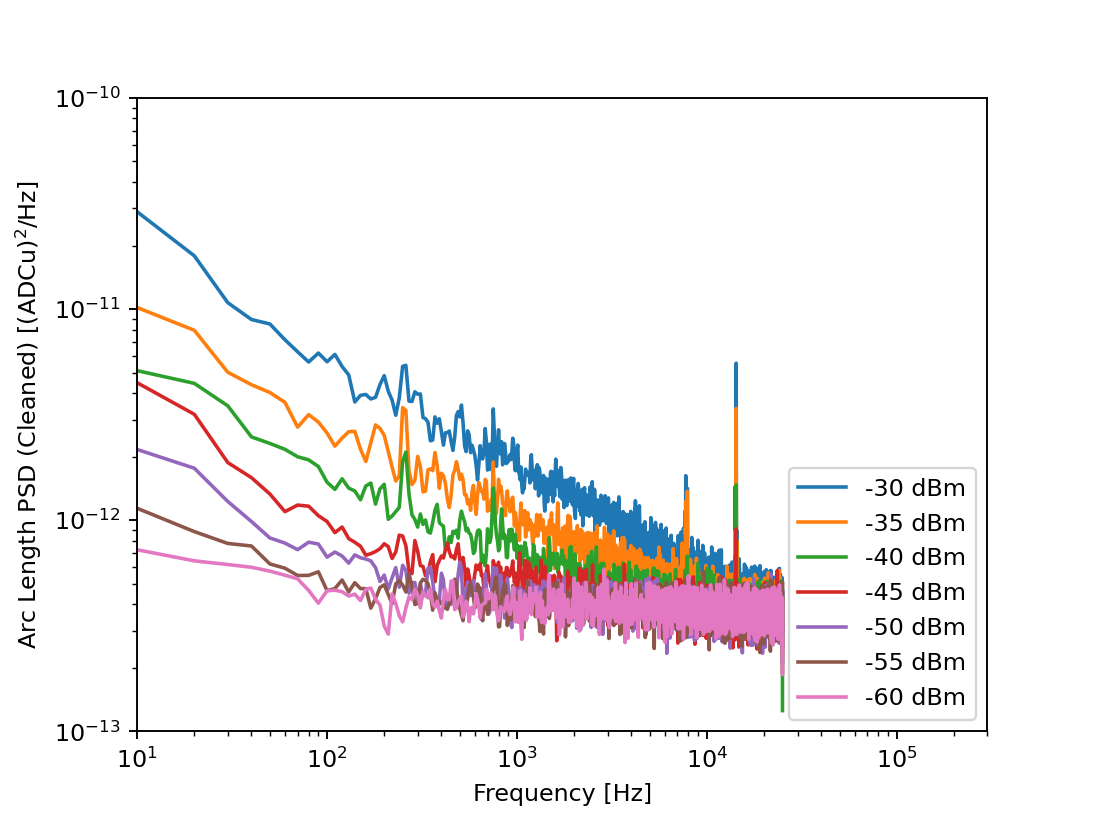

<IPython.core.display.Javascript object>


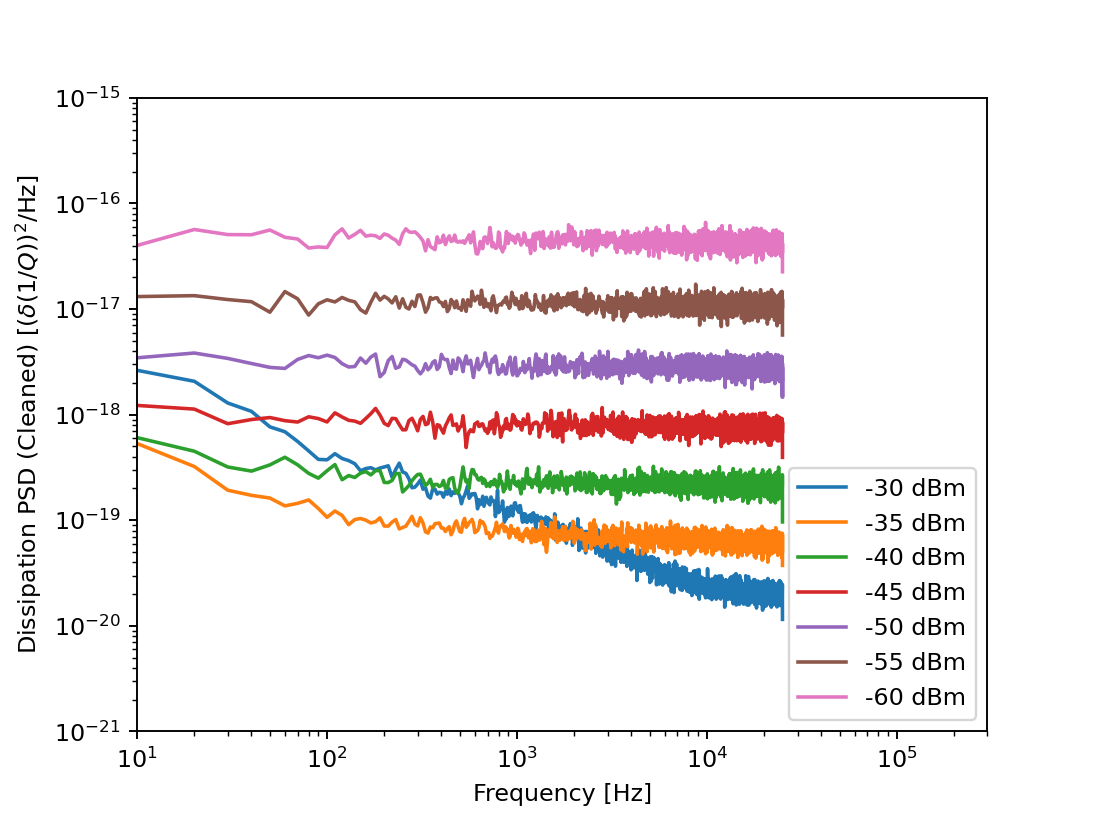

<IPython.core.display.Javascript object>


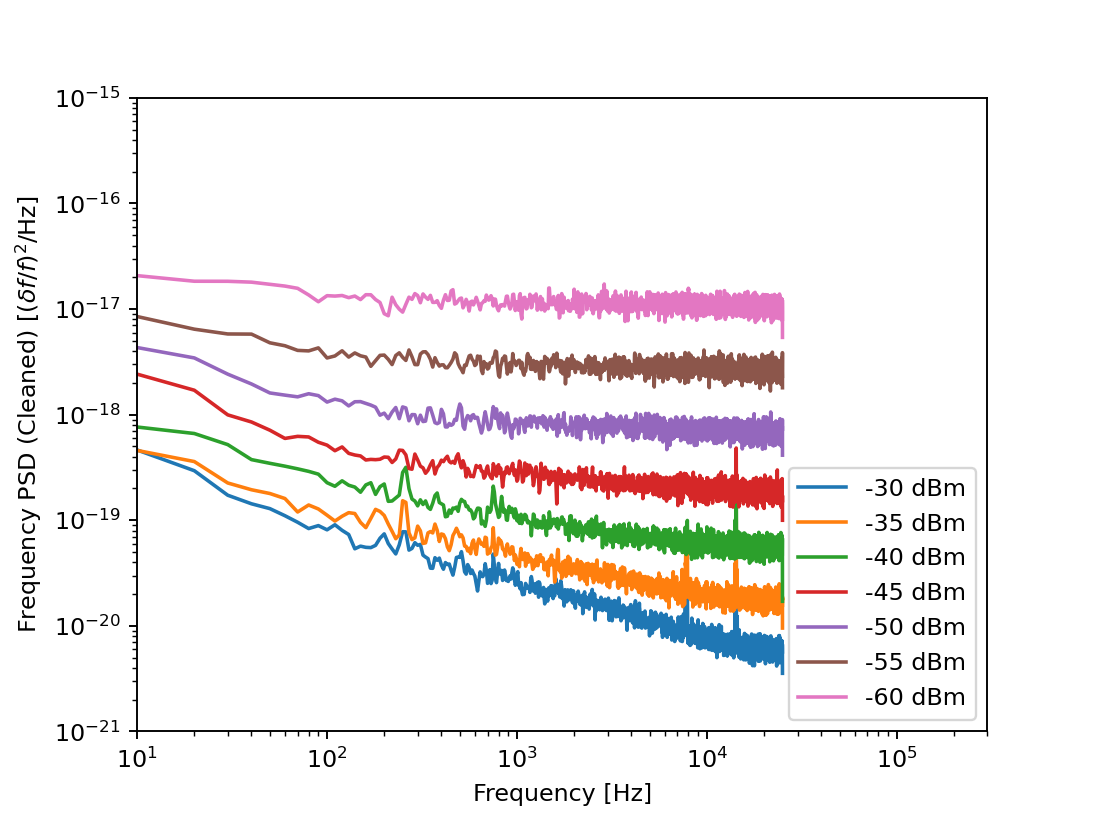

<IPython.core.display.Javascript object>


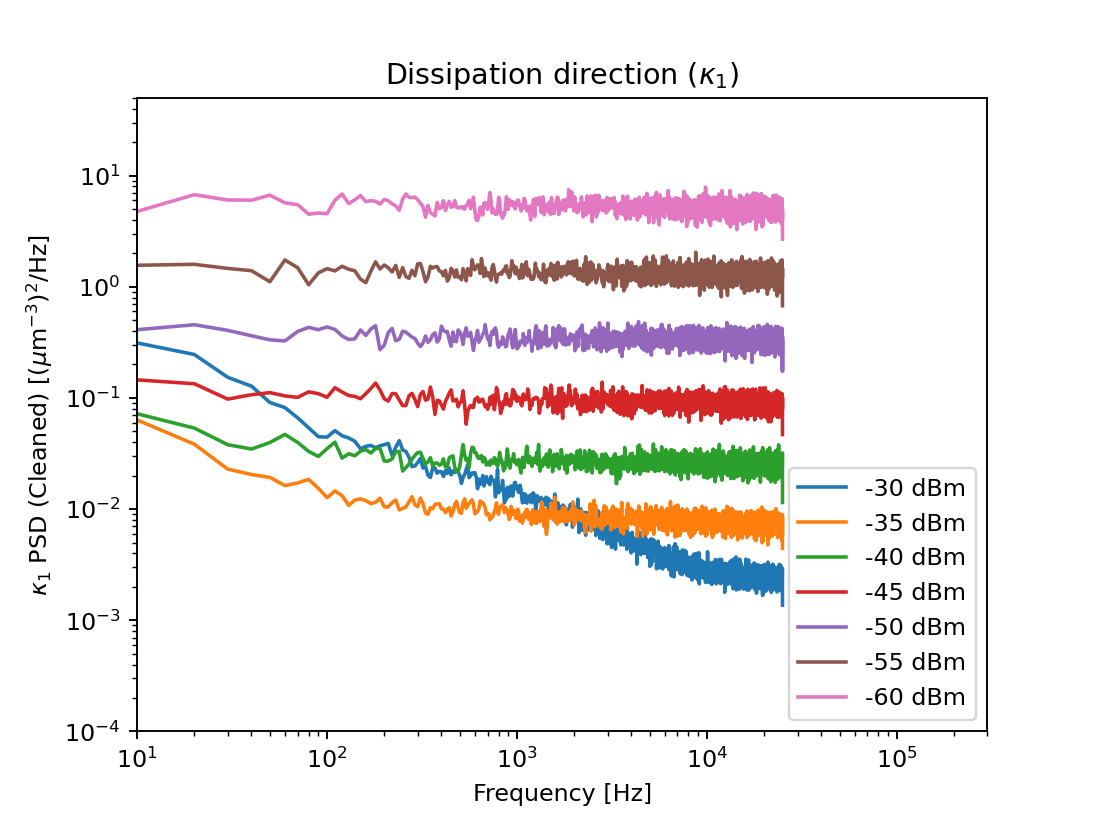

<IPython.core.display.Javascript object>


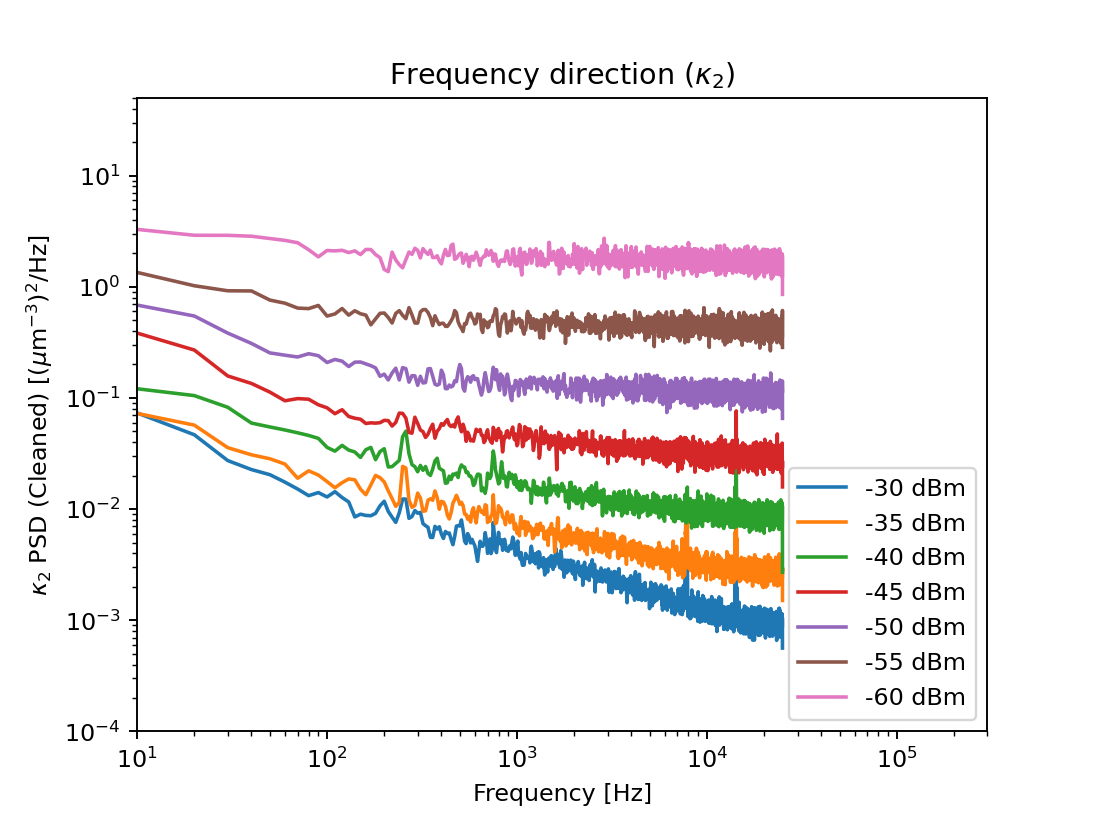

pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230410/20230410_120536/USRP_Noise_20230410_120536_delta0.h5 because override=True!
found 1 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230410/20230410_120536/USRP_Noise_20230410_120536_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230410/20230410_120407/USRP_Noise_20230410_120407_delta0.h5 because override=True!
found 4 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230410/20230410_120407/USRP_Noise_20230410_120407_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230410/20230410_120238/USRP_Noise_20230410_120238_delta0.h5 because override=True!
found 7 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230410/20230410_120238/USRP_Noise_20230410_120238_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230410/20230410_120110/USRP_Noise_20230410_120110_delta0.h5 because override=True!
found 7 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230410/20230410_120110/USRP_Noise_20230410_120110_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230410/20230410_115942/USRP_Noise_20230410_115942_delta0.h5 because override=True!
found 3 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230410/20230410_115942/USRP_Noise_20230410_115942_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230410/20230410_115814/USRP_Noise_20230410_115814_delta0.h5 because override=True!
found 5 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230410/20230410_115814/USRP_Noise_20230410_115814_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230410/20230410_115640/USRP_Noise_20230410_115640_delta0.h5 because override=True!
found 2 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230410/20230410_115640/USRP_Noise_20230410_115640_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!


In [8]:
Thf.PlotPSDsByPower(series_list, powers_list, 
    PSD_lo_f=1e1, PSD_hi_f=5e4, fHz_range = [1e1,3e5], 
    e_b_PSDrange = [1e-13,1e-10], r_b_PSDrange = [1e-21,1e-15], 
    q_b_PSDrange = [1e-4,5e1], MB_fit_result=MB_fit_vals)